In [ ]:
# %%

terror_results = "./results/terror_configs.txt"
street_results = "./results/streets_configs.txt"
book_results = "./results/polbooks_configs.txt"
football_results = "./results/football_configs.txt"
import numpy as np
def get_node_memberships(path):
    with open(path) as f:
        lines = f.readlines()[-1]
    final_config = list(map(int,lines.strip().split(' ')))
    memberships = list(map(decode_membership,final_config))
    return memberships
    # binary_nums = list(map(bin,final_config))
def decode_membership(num:int)->list:
    groups = []
    current_position=0
    while num>0:
        if num&1:
            groups.append(current_position)
        num>>=1
        current_position+=1
    return groups

def get_group_membersips(memberships):
    node_memberships_dict = {i:memberships[i] for i in range(len(memberships))}
    group_memberships = {}
    for node,groups in node_memberships_dict.items():
        for g in groups:
            group_memberships.setdefault(g,[]).append(node)
    return group_memberships

def plot_results(node_memberships,graph,title):
    top_membership = [max(memb_list) for memb_list in node_memberships]
    num_groups = max(top_membership) + 1 
    colors = plt.cm.tab20(range(num_groups))  # Generate a set of colors
    node_colors = [colors[t] for t in top_membership]
    patches = [mpatches.Patch(color=colors[g],label=f"Group {g}") for g in range(num_groups)]
    nx.draw(graph,node_size=42,node_color=node_colors)
    plt.legend(handles=patches,title=title)

In [ ]:
#%%

from data import get_terror,get_streets,get_dataset
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

105 441


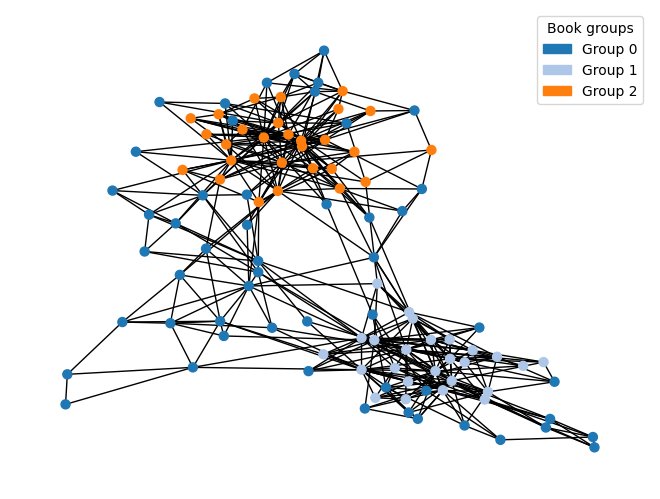

In [ ]:
#%%

np.random.seed(42)
G = get_dataset("polbooks")
results = book_results
memberships = get_node_memberships(results)
group_memberships = get_group_membersips(memberships)
plot_results(memberships,G,"Book groups")

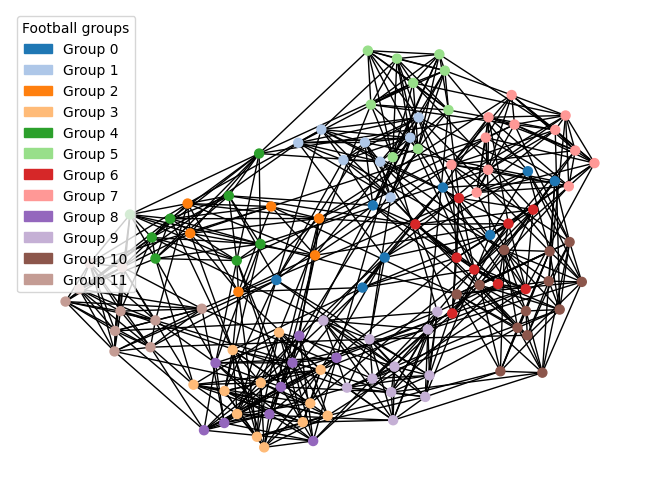

In [ ]:
# %%

np.random.seed(42)
G = get_dataset("football")
results = football_results
memberships = get_node_memberships(results)
group_memberships = get_group_membersips(memberships)
plot_results(memberships,G,"Football groups")

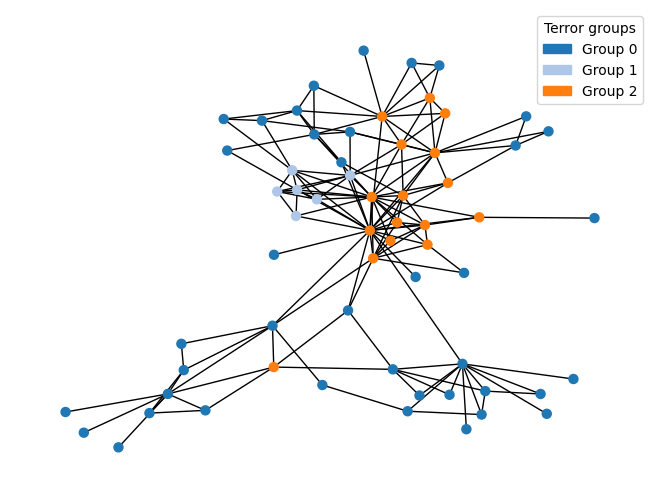

In [ ]:
#%%

G = get_terror()
np.random.seed(42)
results = terror_results
memberships = get_node_memberships(results)
group_memberships = get_group_membersips(memberships)
plot_results(memberships,G,"Terror groups")

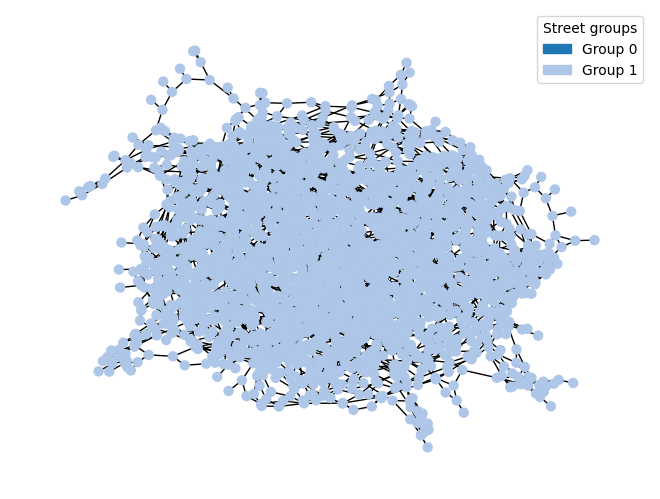

In [ ]:
# %%

G = get_streets()
np.random.seed(42)
memberships = get_node_memberships(street_results)
group_memberships = get_group_membersips(memberships)
plot_results(memberships,G,"Street groups")